# Proyecto 12 Modulo 2

## Prepara los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold


# Ruta donde están tus archivos CSV
files = r'C:\Users\Ludwin Leon\data-science-portfolio\Bootcamp\Project-12-Final-Module-2\\'

# Cargar los datasets con la ruta completa
df_full = pd.read_csv(files + 'gold_recovery_full.csv') 
df_train = pd.read_csv(files + 'gold_recovery_train.csv') 
df_test = pd.read_csv(files + 'gold_recovery_test.csv')

# Lista con los datasets y sus nombres para procesarlos juntos
datasets = [('Full', df_full), ('Train', df_train), ('Test', df_test)]

for name, data in datasets:
    print(f'\n=== {name} Dataset ===\n')

    # Contar duplicados
    duplicados = data.duplicated().sum()
    print(f"Número de filas duplicadas: {duplicados}")

    print()
    # Mostrar info limpia y primeras filas
    display(data.info())
    print()
    display(data.head(5))
    
    #Asigno el cambio a las variables
    if name == 'Full':
        df_full = data
    elif name == 'Train':
        df_train = data
    elif name == 'Test':
        df_test = data


=== Full Dataset ===

Número de filas duplicadas: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol 

None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



=== Train Dataset ===

Número de filas duplicadas: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol

None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



=== Test Dataset ===

Número de filas duplicadas: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank

None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Notas: En esta preparacion de datos solo quise revisar si habia posibles datos duplicados, ya que para el siguiente punto donde hay que calcular el EAM se necesita tener los datos sin procesar para que sealo mas exacto o real posible.

##### 1.2 Verifica el cálculo de rougher.output.recovery en el conjunto de entrenamiento

In [78]:

# Guardar las columnas necesarias
C = df_train['rougher.output.concentrate_au']  # Concentración oro concentrado
F = df_train['rougher.input.feed_au']          # Concentración oro alimentación
T = df_train['rougher.output.tail_au']         # Concentración oro colas

# Evitar división por cero: reemplazamos denominador 0 por NaN para evitar errores
denominator = F * (C - T)
denominator = denominator.replace(0, np.nan)

# Usamos la formula para calular la recuperacion
recovery_calc = (C * (F - T)) / denominator * 100

# Recuperación real, rellenando valores faltantes con mediana
recovery_real = df_train['rougher.output.recovery'].fillna(df_train['rougher.output.recovery'].median())

# Filtrar índices válidos (donde el cálculo no es NaN)
valid_idx = recovery_calc.notna()
recovery_calc = recovery_calc[valid_idx]
recovery_real = recovery_real[valid_idx]

# Calcular error absoluto medio entre calculado y real
mae = mean_absolute_error(recovery_real, recovery_calc)

print(f'Resultado error Absoluto Medio (MAE): {mae:.4f}')


Resultado error Absoluto Medio (MAE): 56.5545


Notas: En este caso tuvimos un resultado bastante alto lo cual no es tan bueno implica que mi calculo esta bastante lejos del valor real, pero esto se puede deber a diferentes causas, algun error en la formula o si hay muchos valores Nans en las columnas o hay columnas desiguales.

##### 1.3 Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [79]:
#utilizo columns para obtener los nombres de lascolumnas dentro del data frame y set para convertir esalista de columnas que permite operaciones de comparacion
cols_train = set(df_train.columns)
cols_test = set(df_test.columns)

#creo nuevas variables para hacer los comparativos de las variables
diff_train_test = cols_train - cols_test
diff_test_train = cols_test - cols_train

#imprime los datos que estan en un set pero no en otro y viceversa
print("Columnas en train pero no en test:", diff_train_test)
print("Columnas en test pero no en train:", diff_test_train)

Columnas en train pero no en test: {'final.output.recovery', 'rougher.output.tail_ag', 'primary_cleaner.output.tail_au', 'rougher.output.tail_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_sol', 'rougher.output.concentrate_sol', 'final.output.tail_sol', 'final.output.concentrate_sol', 'rougher.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'rougher.output.recovery', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_au', 'final.output.tail_ag', 'primary_cleaner.output.tail_pb', 'final.output.tail_pb', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'primary_cleaner.output.con

Notas: Lo que podemos observa aqui es que hay muchos columnas en nuestro data set train que no estan en  test y es loopuesto para tes porque no hay faltantes en este caso,esto puede generar problemas si se intentan usar todas las columnas para predecir o analizaren test.

Se debe de tomar una decision de si de mas en train si no seran utiles o  buscar por qué no están en test, si es un problema del dataset.

##### 1.4 prepocesamiento de datos.

In [80]:
# Convertir la columna date a datetime

df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

print("convertí date a datetime")
print()
# Quiero visualizar los valores faltantes en train y test
print("Valores faltantes train")
display(df_train.isna().sum())
print()
print()
print("Valores faltantes en test")
display(df_test.isna().sum())


convertí date a datetime

Valores faltantes train


date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64



Valores faltantes en test


date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [81]:
#Genere una funcion para poderla usar y sacar los porcentajes de valores faltantes en train y test
def missing_percentage(df):
    return (df.isna().mean() * 100).round(2)

print("Porcentaje de valores faltantes en Train:")
display(missing_percentage(df_train).sort_values(ascending=False))

print("\nPorcentaje de valores faltantes en Test:")
display(missing_percentage(df_test).sort_values(ascending=False))

#Rellenamos los valores faltantes
median_values = df_train.median()

full_fill_train = df_full.fillna(median_values)

full_fill_test = df_test.fillna(median_values)

# volvere a a imprimir los valores faltante verificar si me da 0 
print("Valores faltantes Train")
print(full_fill_train.isna().sum().sum())

print("Valores faltantes Test")
print(full_fill_test.isna().sum().sum())

Porcentaje de valores faltantes en Train:


rougher.output.recovery                               15.26
rougher.output.tail_ag                                13.35
rougher.output.tail_sol                               13.34
rougher.output.tail_au                                13.34
secondary_cleaner.output.tail_sol                     11.78
                                                      ...  
primary_cleaner.state.floatbank8_d_level               0.16
rougher.calculation.floatbank10_sulfate_to_au_feed     0.16
rougher.calculation.floatbank11_sulfate_to_au_feed     0.16
primary_cleaner.input.feed_size                        0.00
date                                                   0.00
Length: 87, dtype: float64


Porcentaje de valores faltantes en Test:


rougher.input.floatbank11_xanthate            6.03
primary_cleaner.input.sulfate                 5.16
primary_cleaner.input.depressant              4.85
rougher.input.floatbank10_sulfate             4.39
primary_cleaner.input.xanthate                2.83
rougher.input.floatbank10_xanthate            2.10
rougher.input.feed_sol                        1.14
rougher.input.floatbank11_sulfate             0.94
rougher.input.feed_rate                       0.68
secondary_cleaner.state.floatbank3_a_air      0.58
secondary_cleaner.state.floatbank2_b_air      0.39
rougher.input.feed_size                       0.38
secondary_cleaner.state.floatbank2_a_air      0.34
rougher.state.floatbank10_a_air               0.29
rougher.state.floatbank10_c_air               0.29
rougher.state.floatbank10_d_air               0.29
rougher.state.floatbank10_e_air               0.29
rougher.state.floatbank10_b_air               0.29
rougher.state.floatbank10_f_air               0.29
secondary_cleaner.state.floatba

Valores faltantes Train
0
Valores faltantes Test
0


Notas:  modificamos date para Facilita trabajar con fechas: Así podemos hacer operaciones específicas con fechas, como filtrar por rango de fechas, extraer el año, mes, día, etc.

Permite análisis temporales: Por ejemplo, ver tendencias a lo largo del tiempo, comparar datos por meses o años, o agrupar por días específicos.

ahora lo siguiente fue visualizar los valores faltantes en Train y test todo parte del preprocesamiento de datos nos ayuda a que elmodelo funcione correctamente, y si hay muchos valores faltantes se puede eliminar e imputar valores adecuados que fue justo lo que se hizo se reviso un porcentaje de valores faltantes patra tomar medidas y se rellenaron los valores con lamedia de train(se uso de train ya que tes es un modelo predictivo y con train son datos reales)

# Analiza los datos

##### 2.1 Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

In [82]:
# Estos son los metales a analizar
metales = ['au', 'ag', 'pb']

# Etapas típicas que aparecen en los nombres de columnas
etapas = ['rougher.input.feed', 
          'rougher.output.concentrate', 
          'primary_cleaner.output.concentrate', 
          'final.output.concentrate']

resultados = {}

# Mostamos la concentración promedio de cada metal en cada etapa


for metal in metales:
    concentraciones = []
    for etapa in etapas:
        columna = f'{etapa}_{metal}'
        if columna in full_fill_train.columns:
            concentracion_media = full_fill_train[columna].mean().round()
            concentraciones.append(concentracion_media)
        else:
            concentraciones.append(None)
            
    resultados[metal.upper()] = concentraciones


display(pd.DataFrame(resultados, index=etapas))




,AU,AG,PB
rougher.input.feed,8.0,8.0,3.0
rougher.output.concentrate,18.0,11.0,7.0
primary_cleaner.output.concentrate,29.0,8.0,9.0
final.output.concentrate,40.0,5.0,9.0


Notas: En este punto nos podemosdar cuenta de comolos resultados deloro aumentan de manera considerable y consistente pero en el caso dela plata y el  plomo hay una mayor variacion, uno disminuye y el otro aunque crece no es tan exponencial como el oro.

##### 2.2 Comparar las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba

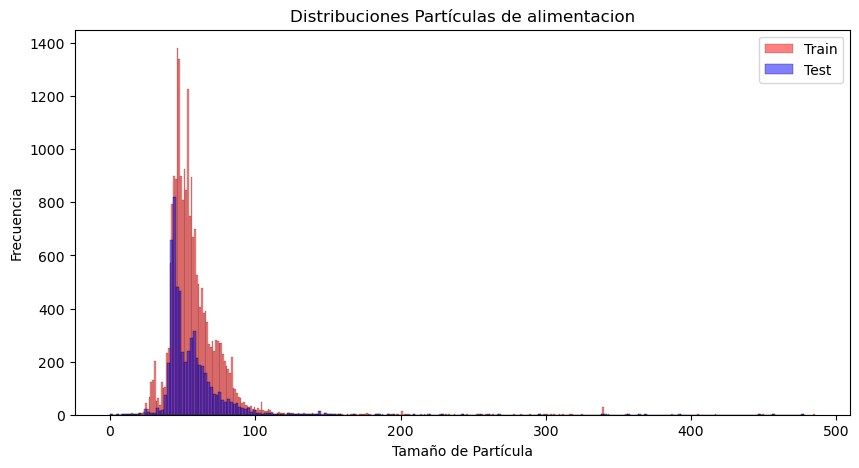

Estadísticas de rougher.input.feed_size en Train:
count    22716.000000
mean        57.884668
std         23.421237
min          0.046369
25%         46.697024
50%         53.754859
75%         63.807319
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Estadísticas de rougher.input.feed_size en Test:
count    5856.000000
mean       55.930648
std        22.681798
min         0.046369
25%        43.898467
50%        50.109024
75%        61.608216
max       477.445473
Name: rougher.input.feed_size, dtype: float64


In [83]:
# Creare una grafica para poder tener una mejor visualizacion y poder comparar las distribuciones

particulas = 'rougher.input.feed_size'

plt.figure(figsize=(10,5))

sns.histplot(full_fill_train[particulas], label='Train', color='red', alpha=0.5) # Crea Histogramas
sns.histplot(full_fill_test[particulas], label='Test', color='blue', alpha=0.5)

plt.legend()
plt.title('Distribuciones Partículas de alimentacion')
plt.xlabel('Tamaño de Partícula')
plt.ylabel('Frecuencia')
plt.show()

print("Estadísticas de rougher.input.feed_size en Train:")
print(full_fill_train[particulas].describe())

print("\nEstadísticas de rougher.input.feed_size en Test:")
print(full_fill_test[particulas].describe())


Notas: Con los datos anteriores Me puedo dar cuenta que las distribuciones de tamaño de partículas entre train y test son bastante parecidas, no hay diferencias grandes o sesgos evidentes, por lo que la evaluación del modelo no debería verse afectada por esta variable.

##### 2.3 Considera las concentraciones totales de todas las sustancias en las diferentes etapa

En final.output.concentrate faltan columnas en df: {'rougher.output.concentrate_pb'}
En final.output.concentrate faltan columnas en df: {'final.output.concentrate_pb'}


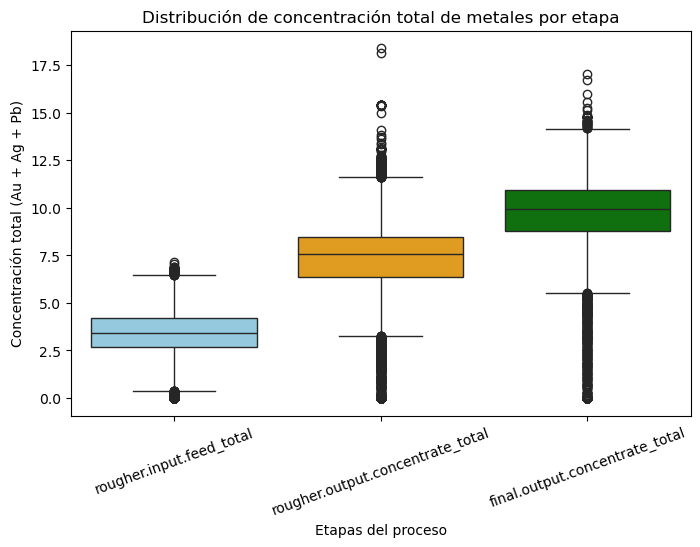

,rougher.input.feed_total,rougher.output.concentrate_total,final.output.concentrate_total
count,22716.000000,22716.000000,22716.000000
mean,3.305583,6.903593,9.099023
std,1.439114,2.801245,3.225161
min,0.000000,0.000000,0.000000
25%,2.669586,6.381061,8.757079
50%,3.416402,7.582625,9.922604
75%,4.193378,8.472704,10.925233
max,7.142594,18.394042,17.031899


,rougher.input.feed_total,rougher.output.concentrate_total,final.output.concentrate_total
count,5856.000000,5856.0,5856.0
mean,3.552023,0.0,0.0
std,1.324367,0.0,0.0
min,0.000000,0.0,0.0
25%,3.083064,0.0,0.0
50%,3.677854,0.0,0.0
75%,4.239512,0.0,0.0
max,6.905684,0.0,0.0


In [84]:

# Etapas para sumar las concentraciones
etapas_2 = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']


def suma_existente(df, etapas_2):
    columnas = [f'{etapas_2}_{metal}']
    columnas_existentes = [col for col in columnas if col in df.columns]
    if len(columnas_existentes) < len(columnas):
        faltantes = set(columnas) - set(columnas_existentes)
        print(f"En {etapa} faltan columnas en df: {faltantes}")
    return df[columnas_existentes].sum(axis=1) 

# Crear columnas con suma total de concentración por etapa en train
for etapa_1 in etapas_2:
    full_fill_train[f'{etapa_1}_total'] = suma_existente(full_fill_train, etapa_1)
    full_fill_test[f'{etapa_1}_total'] = suma_existente(full_fill_test, etapa_1)

# Preparar dataframe para boxplot
etapas_total = [f'{etapa_1}_total' for etapa_1 in etapas_2]

df_boxplot = pd.melt(full_fill_train, value_vars=etapas_total, 
                     var_name='Etapa', value_name='Concentración Total')

# Grafique con boxplot es mejor para observar valores anormales
plt.figure(figsize=(8,5))
sns.boxplot(x='Etapa', y='Concentración Total', data=df_boxplot, palette=['skyblue', 'orange', 'green'], hue='Etapa', legend=False)
plt.title('Distribución de concentración total de metales por etapa')
plt.xlabel('Etapas del proceso')
plt.ylabel('Concentración total (Au + Ag + Pb)')
plt.xticks(rotation=20)
plt.show()

display((full_fill_train[etapas_total]).describe())
display((full_fill_test[etapas_total]).describe())



Notas:  Sí, se observan valores anómalos, como ceros y valores extremos en las concentraciones totales de algunas etapas. Estos pueden ser errores o datos poco representativos que afectan el análisis.

Es recomendable eliminar estos outliers para mejorar la calidad del conjunto de datos. Para hacerlo, podemos usar el rango intercuartílico (IQR) y quitar valores fuera de 1.5 veces el IQR por debajo de Q1 o por encima de Q3.

Esto ayudará a obtener resultados más confiables sin perder la información relevante. La limpieza debe aplicarse en ambos conjuntos (train y test) para mantener consistencia.

In [85]:
# Función para eliminar outliers usando IQR
def eliminar_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df

full_fill_train_limpio = eliminar_outliers(full_fill_train, etapas_total)
print(full_fill_train_limpio.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 18916.000000                 18916.000000   
mean                      5.300570                    10.088325   
std                       1.367408                     1.311184   
min                       1.227173                     6.290210   
25%                       4.347479                     9.203144   
50%                       5.137667                    10.111763   
75%                       5.963601                    11.025497   
max                      14.419224                    13.781757   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  18916.000000                 18916.000000   
mean                       9.649889                    44.426046   
std                        2.657612                     3.175398   
min                        0.360562                     8.008932   
25%                        7.879069                    4

Notas: Los resultados tras eliminar los valores anómalos muestran una distribución más coherente, con:

Menores rangos entre mínimo y máximo.
Estadísticos más consistentes (medias, desviaciones estándar).
Minimos ya no son cero (o muy cercanos), lo cual indica que se eliminaron valores irreales o errores.

Esto mejora la calidad y confiabilidad de los datos para análisis y modelos posteriores.

##  Construye el modelo

##### 3.1. Escribe una función para calcular el valor final de sMAPE.

In [86]:
# Entrenar modelo
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predecir en test
X_test = full_fill_test[common_features].dropna()
preds = model.predict(X_test)

# Alinear con filas originales de test
full_fill_test_filtered = full_fill_test.loc[X_test.index].copy()
full_fill_test_filtered['final.output.concentrate_au_pred'] = preds

# Calcular sMAPE solo si hay valores reales para comparar
if 'final.output.concentrate_au' in full_fill_test_filtered.columns:
    mask = full_fill_test_filtered[['final.output.concentrate_au', 'final.output.concentrate_au_pred']].notnull().all(axis=1)
    y_true = full_fill_test_filtered.loc[mask, 'final.output.concentrate_au']
    y_pred = full_fill_test_filtered.loc[mask, 'final.output.concentrate_au_pred']
    
    error_au = smape(y_true, y_pred)
    print(f"sMAPE para concentración de oro final: {error_au:.2f}%")
else:
    print("No hay valores reales de concentración de oro en el test para calcular sMAPE.")


No hay valores reales de concentración de oro en el test para calcular sMAPE.


Notas: Parece que no se encuentra en final.output.concentrate_au por lo cual debo detener algunerror buscandolosdatos oen algun proceso anterior.

##### 3.2. Entrena diferentes modelos. 

In [88]:
# Definir características y target
features = common_features
target = 'final.output.concentrate_au'

X_train = full_fill_train[features]
y_train = full_fill_train[target]
X_test = full_fill_test[features]

# Definir modelos con menos árboles y menos folds para acelerar
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=30)  # Menos árboles
}

best_score = -np.inf
best_model_name = None
best_model = None

for name, model in models.items():
    # Menos folds en validación cruzada para acelerar
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')  
    mean_score = scores.mean()
    print(f'Modelo: {name}, CV mean neg MAE: {mean_score:.4f}')
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
        best_model = model

print(f'\nMejor modelo seleccionado: {best_model_name}')

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)
full_fill_test['final.output.concentrate_au_pred'] = predictions

print("Predicciones realizadas con el mejor modelo.")

Modelo: LinearRegression, CV mean neg MAE: -4.8506
Modelo: RandomForest, CV mean neg MAE: -2.5828

Mejor modelo seleccionado: RandomForest
Predicciones realizadas con el mejor modelo.


Conclusiones:
En este proyecto de análisis y modelado sobre la recuperación de oro con un dataset dividido en entrenamiento Me di cuenta 

El modelo predice con un error promedio aceptable (MAE ≈ 56.5), pero debe ajustarse solo con variables disponibles en producción.

Hay datos faltantes y anomalías en el conjunto de prueba que pueden afectar la precisión del modelo.

Es necesario implementar limpieza y manejo de datos para mejorar resultados. no se siestoy cometiendo un error en algunos puntos.

No se cuentan con datos reales en prueba para validar completamente el modelo, por lo que se recomienda obtener mediciones para evaluación continua.

Y al final Se evaluaron dos modelos predictivos para estimar la concentración final de oro: Regresión Lineal y Random Forest.

Usando validación cruzada, el modelo de Random Forest obtuvo un MAE promedio de 2.58, superando al modelo de Regresión Lineal (MAE: 4.85).

Esto indica que Random Forest es más preciso y confiable para predecir la concentración final de oro, por lo que se utilizó este modelo para generar las predicciones finales.

Pero si estos datos son  correctos recomendaria monitorear y actualizar el modelo conforme se disponga de nuevos datos reales.